In [1]:
from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3

n_range = range(740, 868)
N = len(n_range)
    
SXM_PATH = ["electromigration_18/Image_{0:03}.sxm".format(i) for i in n_range] #Replace value as appropriate
base_filename = "electromigration_18_{0:03}-{1:03}_tiled".format(n_range[0],n_range[-1])
#SXM_PATH = "electromigration_8/Image_001.sxm"
OUTPUT = "./jpg/"

import matplotlib as mpl 
import matplotlib.pyplot as plt

%matplotlib inline

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(10, 5))
mpl.rc('image', cmap='gray')
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience
import os
from ntpath import basename

import pims
import pySPM as spm 
import trackpy as tp
import glob

#@pims.pipeline
#def gray(image):
#    return image[:, :, 1]  # Take just the green channel
#frames = gray(pims.open('../track_molecules/*.bmp'))

class SXMReader(pims.FramesSequence):
    def __init__(self, filename_pattern):
        #self.filenames = glob.glob(filename_pattern)
        self.filenames = filename_pattern
        self.scans = [spm.SXM(filename) for filename in self.filenames]
        self.z_data = np.array([s.get_channel("Z").correct_lines().pixels for s in self.scans]) #grab z-channel
        min_z = np.min(self.z_data)
        max_z = np.max(self.z_data)
        self.z_data -= min_z
        self.z_data /= max_z-min_z
        self._len = len(self.z_data)
        self._dtype = self.z_data.dtype
        self._frame_shape = self.z_data[0].shape
        self.scan_size = self.scans[0].size
        self.meters_per_pixel = self.scan_size['real']['x']/self.scan_size['pixels']['x']
       
    def get_frame(self, i):
        # Access the data you need and get it into a numpy array.
        # Then return a Frame like so:
        return pims.Frame(self.z_data[i], frame_no=i)

    def __len__(self):
        return self._len

    @property
    def frame_shape(self):
        return self._frame_shape

    @property
    def pixel_type(self):
        return self._dtype
    
frames = SXMReader(SXM_PATH)
frames=frames[::1]
#new_frames=[]
#for i,frame in enumerate(frames):
#    new_frames.append(frame[::-1])
#frames=new_frames

In [2]:
for i, f in enumerate(frames):
    plt.imsave(OUTPUT + SXM_PATH[i][:-4] + '.jpg', frames[i][::-1])

In [227]:
OUTPUT + SXM_PATH[0][:-4] + '.jpg'

'./jpg/electromigration_15/Image_581.jpg'

In [222]:
frames

Sliced SXMReader. Original repr:
    <Frames>
    Length: 10 frames
    Frame Shape: 192 x 192
    Pixel Datatype: float64

In [2]:
## Output image to ./output/electromigration_n/Image_{}.png
#for i, f in enumerate(frames.filenames):
#    plt.imsave(OUTPUT + basename(f)[:-4] + '.png', frames.get_frame(i))

In [157]:
for i in range(1):
    print(i)

0


In [170]:
ax[1]

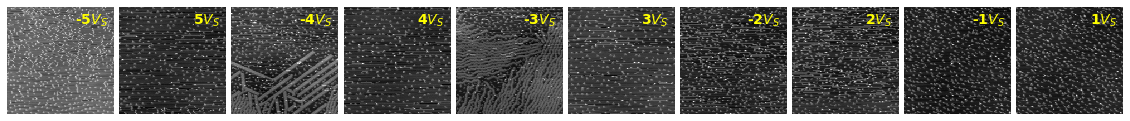

In [207]:
## Output matrix of images to ./output/electromigration_8_{0:03}-{1:03}_tiled.png
x, y = 1, 10
V = [-5,5,-4,4,-3,3,-2,2,-1,1]
#V = np.arange(0,10*N,10)
#V = np.arange(60,-70,-10)
#V=[0,3,3,3,10,10,10,10,20,20,20,20,20,20,40,40,40,40,40,40,40]
#V=[i for i in range(60, -65, -5)]
#T=["0s", "100us", "1ms", "10ms", "100ms", "1s", "10s", "100s"]
# V=np.cumsum(V)
#for i, f in enumerate(frames.filenames):
mpl.rc('figure',  figsize=(20, 10))
fig, ax = plt.subplots(x, y)
plt.subplots_adjust(wspace=0.05, hspace=0.05) #for 25 images (wspace=-0.8, hspace=0.05) #wspace=-0.69, hspace=0.01 #wspace=-0.1, hspace=0.01
for i in range(x):
    for j in range(y):
        #k = (i * y + j) % (x + y)
        k = i * y + j
        #print(i)
        #print(j)
        if k < N:
            #ax[i,j].imshow(frames[k])
            ax[k].imshow(frames[k])
            ax[k].text(180,160, "{}$V_S$".format(V[k]), ha="right", weight='bold', color="yellow", fontsize =14)
            #ax[i,j].text(120,110, T[k], ha="right", weight='bold', color="yellow", fontsize =14)
        ax[k].invert_yaxis()
        ax[k].axis('off')
        ax[k].set_aspect('equal')
        
plt.savefig(os.path.join(OUTPUT,base_filename), bbox_inches='tight')

In [117]:
V = [-5,5,-4,4,-3,3,-2,2,-1,1]

In [118]:
V[0]

-5

In [ ]:
#im.save('out.gif', save_all=True, append_images=frames)